# Mathematik für Biologiestudierende II

Sommersemester 2025

20.05.2025

&copy; 2025 Prof. Dr. Rüdiger W. Braun 

In [1]:
import numpy as np
np.set_printoptions(legacy='1.21')
import pandas as pd
from scipy import stats
import seaborn as sns
sns.set_theme()
from statsmodels.graphics.mosaicplot import mosaic

# Themen

* $\chi^2$-Unabhängigkeitsstest 
* Vierfeldertest
* exakter Test nach Fisher
* $\chi^2$-Anpassungstest
* ein exakter Permutationstest


# Tests für kategorielle Daten

# $\chi^2$-Unabhängigkeitsstest 

## Erstellung der Kontingenztafel aus einer Tabelle 

In [2]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


* Sind die Reisenden der veschiedenen Klassen mit unterschiedlichen Wahrscheinlichkeiten an den verschiedenen Orten eingestiegen?
* Das ist eine Frage für einen $\chi^2$-Unabhängigkeitstest

In [3]:
tafel = pd.crosstab(df.pclass, df.embark_town)
tafel

embark_town,Cherbourg,Queenstown,Southampton
pclass,,,
1,85,2,127
2,17,3,164
3,66,72,353


## `pd.crosstab`

* `pd.crosstab(spalte1, spalte2)`  erstellt eine Kontingenztafel
* die in `spalte1` auftretenden Werte bilden den Index
* die in `spalte2` auftretenden Werte die Spaltennamen

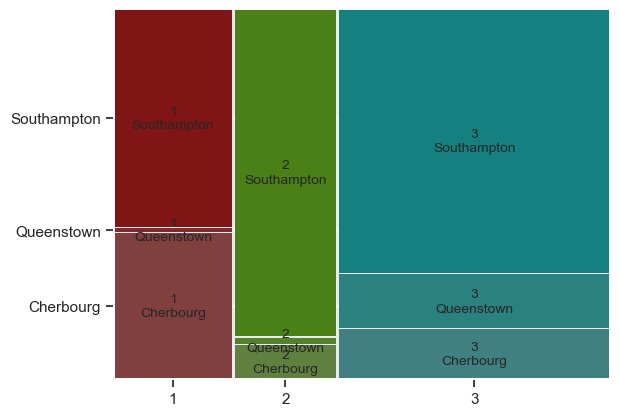

In [4]:
mosaic(tafel.stack());

* Ist der $\chi^2$-Unabhängigkeitstest überhaupt anwendbar?

In [5]:
res = stats.chi2_contingency(tafel)

In [6]:
pd.DataFrame(res.expected_freq)

,0,1,2
0,40.440945,18.535433,155.023622
1,34.771654,15.937008,133.291339
2,92.787402,42.527559,355.685039


In [7]:
res.pvalue

8.435267819894384e-26

#### Warum funktioniert folgendes nicht?

In [8]:
# pd.crosstab(df.class, df.embark_town)  # invalid syntax

SyntaxError: invalid syntax (1419250578.py, line 1)

## Python:  reservierte Worte

* Einige Worte wie `import` und `def` können nicht als Variablennamen verwendet werden

* Dazu gehört auch `class`

* Das ist die Ursache des Fehlers

* Aber als Text dürfen reservierte Wörter sehr wohl vorkommen

In [9]:
pd.crosstab(df['class'], df.embark_town)

embark_town,Cherbourg,Queenstown,Southampton
class,,,
First,85,2,127
Second,17,3,164
Third,66,72,353


# Vierfeldertest

Der $\chi^2$-Unabhängigkeitstest mit zwei Zeilen und zwei Spalten heißt *Vierfeldertest*

In [10]:
tafel = pd.DataFrame(index=['Tag', 'Dämmerung'])
tafel['Mauerbienen'] = [131, 7]
tafel['Holzbienen'] = [18, 4]
tafel

,Mauerbienen,Holzbienen
Tag,131,18
Dämmerung,7,4


In [11]:
res = stats.chi2_contingency(tafel)

In [12]:
pd.DataFrame(res.expected_freq)

,0,1
0,128.5125,20.4875
1,9.4875,1.5125


# Exakter Test nach Fisher

* Der $\chi^2$-Test ist approximativ, d.h. er ist nur bei genügend großen Stichprobenumfängen gültig (wenn nämlich alle erwarteten Werte mindestens 5 sind)
* Diese Kompromisse waren vor der Einführung leistungsfähiger Computer unausweichlich, werden heute aber kritischer betrachtet

* Eine Alternative zum Vierfeldertest ist der exakte Test von Fischer

In [13]:
stats.fisher_exact(tafel)

SignificanceResult(statistic=4.158730158730159, pvalue=0.046533029009005966)

# Der $\chi^2$-Anpassungstest

auch $\chi^2$-Verteilungsstest genannt

### Beispiel Geburten pro Wochentag

In einem amerikanischen Krankenhaus wurden im Jahr 1999 die folgenden Anzahlen an Geburten beobachtet

| Wochentag | Tage im Jahr | Anzahl Geburten |
|:----------|--------------|-----------------|
| Montag    | 52           | 41              |
| Dienstag  | 52           | 63              |
| Mittwoch  | 52           | 63              |
| Donnerstag| 52           | 47              |
| Freitag   | 53           | 56              |
| Samstag   | 52           | 47              |
| Sonntag   | 52           | 33              |

* Sind diese Zahlen mit der Nullhypothese vereinbar, dass Geburten an allen Wochentagen gleich häufig auftreten?  
* Diese Frage soll zum Signifikanzniveau $\alpha = 0.05$ beantwortet werden.

## Anpassungstest: Test auf Übereinstimmung der Daten mit einer Verteilung

* Unabhängige Zufallsvariable $X_1, \dots, X_n $, die alle mit Wahrscheinlichkeit $p_1$ den Wert $w_1$, mit Wahrscheinlichkeit $p_2$ den Wert $w_2$, ... und mit Wahrscheinlichkeit $p_s$ den Wert $w_s$ annehmen
* Vergleichswahrscheinlichkeiten $\pi_1, \pi_2, \dots, \pi_s$ mit $\pi_1 + \pi_2 + \dots + \pi_s = 1$
* Nullhypothese und Alternative:
  * $H_0$: $p_1 = \pi_1, p_2 = \pi_2, \dots, p_s = \pi_s$
  * $H_1$: mindestens ein $p_j \ne \pi_j$

* $y_1$ Anzahl, wie oft $w_1$ aufgetreten ist
* $y_2$ anzahl, wie oft $w_2$ aufgetreten ist
* ...
* erwarteter Wert für $y_1$ ist $n\pi_1$
* erwarteter Wert für $y_2$ ist $n\pi_2$
* ...

* Die Anzahl der Freiheitsgrade ist $s-1$
* Der p-Wert ist $1-\chi^2_{s-1}(t)$ 

### Weiter im Beispiel

In [14]:
tafel = pd.DataFrame(index=['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So'])
tafel['Tage'] = [52, 52, 52, 52, 53, 52, 52]
tafel['Geburten'] = [41, 63, 63, 47, 56, 47, 33]
tafel

,Tage,Geburten
Mo,52,41
Di,52,63
Mi,52,63
Do,52,47
Fr,53,56
Sa,52,47
So,52,33


In [15]:
n = tafel.Geburten.sum()
n

350

#### Tabelle der erwarteten Werte

In [16]:
tafel['erwartet'] = tafel.Tage*n/365
tafel.round(2)

,Tage,Geburten,erwartet
Mo,52,41,49.86
Di,52,63,49.86
Mi,52,63,49.86
Do,52,47,49.86
Fr,53,56,50.82
Sa,52,47,49.86
So,52,33,49.86


#### Tabelle der normierten Differenzen

In [17]:
tafel['Differenz'] = tafel.Geburten - tafel.erwartet
tafel['normierte Differenz'] = tafel.Differenz**2 / tafel.erwartet
tafel

,Tage,Geburten,erwartet,Differenz,normierte Differenz
Mo,52,41,49.863014,-8.863014,1.575376
Di,52,63,49.863014,13.136986,3.461091
Mi,52,63,49.863014,13.136986,3.461091
Do,52,47,49.863014,-2.863014,0.164387
Fr,53,56,50.821918,5.178082,0.527578
Sa,52,47,49.863014,-2.863014,0.164387
So,52,33,49.863014,-16.863014,5.702849


Teststatistik

In [18]:
t = tafel['normierte Differenz'].sum()
t

15.05675927845739

In [19]:
P = stats.chi2(6)
1 - P.cdf(t)

0.01981981977372671

Dasselbe komplett mit `stats`

In [20]:
res = stats.chisquare(tafel.Geburten, tafel.erwartet)
res

Power_divergenceResult(statistic=15.05675927845739, pvalue=0.01981981977372675)

# Ein exakter Permutationstest

### Mendelsche Erbregeln als Beispiel 

* Bei den Mendelschen Erbversuchen tritt das Merkmal *Blütenfarbe* in drei Ausprägungen auf, nämlich weiß, rosa und rot
* Das Modell besagt, dass weiß und rot jeweils mit Wahrscheinlichkeit 25% und rot mit Wahrscheinlichkeit 50% auftreten
* 4 Blüten werden beobachtet, alle sind rosa
* Ist diese Beobachtung zum Signifikanzniveau $\alpha = 0.05$ mit den Mendelschen Regeln vereinbar?
* Im Prinzip ist das dieselbe Frage wie beim $\chi^2$-Test auf Übereinstimmung mit einer gegebenen Verteilung; der Stichprobenumfang ist aber zu klein

### Interpretation als Vergleich zweier Verteilungen

* Nullhypothese:  Die Mendelschen Regeln sind ein valides Modell für die untersuchte Situation
* Das entspricht der Verteilung
 
| Zahlencode | Ausprägung | Wahrscheinlichkeit |
|------------|------------|--------------------|
|     1      | weiß       | 25%                |
|     2      | rosa       | 50%                |
|     3      | rot        | 25%                | 

* Zu vergleichen mit der tatsächlichen Verteilung der Blütenfarben in dem Kollektiv 
* Der Stichprobenumfang ist 4
* Das ist für praktische Zwecke zu wenig, lässt sich aber gut von Hand rechnen

* Ordne die möglichen Ergebnisse mit aufsteigender Wahrscheinlichkeit an
* Entscheidungsstrategie am Beispiel $\alpha = 0.05$

>     Lehne die Nullhypothese ab, wenn die Beobachtung 
>     zu den 5% unwahrscheinlichsten Ereignissen gehört

* Anzahl der Ausprägungen des Merkmals Blütenfarbe $s = 3$
* $X_1$ ist der Zahlencode der Blütenfarbe der ersten Blüte, $X_2$ dasselbe für die zweite Blüte, ...
* $Y_1$ bezeichnet die Anzahl der weißen, $Y_2$ die der rosafarbenen und $Y_3$ die der roten Blüten
* Dann $Y_1 + Y_2 + Y_3 = 4$
* Rechne sämtliche Einzelwahrscheinlichkeiten aus

### Beispiel Mendel: Tabelle der Wahrscheinlichkeiten der  Einzelereignisse

| $k_1$ | $k_2$ | $k_3$ | $P(X_1=k_1, X_2=k_2, X_3=k_3) $ | kumulierte Summe |
|-------|-------|-------|---------------------------------|------------------|
|  $ 0 $ | $ 0 $ | $ 4 $ | $ 0.0039 $ | $ 0.0039 $ |
|  $ 4 $ | $ 0 $ | $ 0 $ | $ 0.0039 $ | $ 0.0078 $ |
|  $ 1 $ | $ 0 $ | $ 3 $ | $ 0.0156 $ | $ 0.0234 $ |
|  $ 3 $ | $ 0 $ | $ 1 $ | $ 0.0156 $ | $ 0.0391 $ |
|  $ 2 $ | $ 0 $ | $ 2 $ | $ 0.0234 $ | $ 0.0625 $ |
|  $ 0 $ | $ 1 $ | $ 3 $ | $ 0.0312 $ | $ 0.0938 $ |
|  $ 3 $ | $ 1 $ | $ 0 $ | $ 0.0312 $ | $ 0.1250 $ |
|  $ 0 $ | $ 4 $ | $ 0 $ | $ 0.0625 $ | $ 0.1875 $ |
|  $ 0 $ | $ 2 $ | $ 2 $ | $ 0.0938 $ | $ 0.2812 $ |
|  $ 1 $ | $ 1 $ | $ 2 $ | $ 0.0938 $ | $ 0.3750 $ |
|  $ 2 $ | $ 1 $ | $ 1 $ | $ 0.0938 $ | $ 0.4688 $ |
|  $ 2 $ | $ 2 $ | $ 0 $ | $ 0.0938 $ | $ 0.5625 $ |
|  $ 0 $ | $ 3 $ | $ 1 $ | $ 0.1250 $ | $ 0.6875 $ |
|  $ 1 $ | $ 3 $ | $ 0 $ | $ 0.1250 $ | $ 0.8125 $ |
|  $ 1 $ | $ 2 $ | $ 1 $ | $ 0.1875 $ | $ 1.0000 $ |

<img src="bilder/mendelbar.svg" alt="Barplot der W'keiten im Mendelbeispiel" width="75%"/>

* Der linke Balken zeigt die kumulierten Werte aus der Tabelle, der rechte die 5%-Schwelle

* Die beobachteten Daten (0,4,0) liegen weit oberhalb dieser Schwelle

In `stats.permutation_test` sind Permutationstests implementiert, und zwar sowohl exakte (für kleine Stichprobenumfänge) als auch Tests mit Monte-Carlo-Methoden